<a href="https://colab.research.google.com/github/ujanichakma/AI_LAB_4-1_2025/blob/main/AI_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [2]:
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    return (x_train, y_train), (x_test, y_test)

In [3]:
def build_model():
    inputs = Input((28, 28))
    x = Flatten()(inputs)
    h1 = Dense(128, activation='relu')(x)
    h2 = Dense(64, activation='relu')(h1)
    outputs = Dense(10, activation='softmax')(h2)
    model = Model(inputs, outputs)
    return model

In [4]:
def compile_model(model):
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )


In [5]:
def train_model(model, x_train, y_train, x_test, y_test):
    """Train the model and return the training history."""
    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_test, y_test),
        verbose=2
    )
    return history

In [9]:
def plot_training_history(history):
    """Plot training & validation accuracy and loss curves."""
    # Accuracy plot
    plt.figure(figsize=(10, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.tight_layout()
    plt.show()

In [10]:
def main():
    # Step 1: Load & preprocess data
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
    print("Training data shape:", x_train.shape, y_train.shape)
    print("Test data shape:", x_test.shape, y_test.shape)

    # Build model
    model = build_model()

    #Compile model
    compile_model(model)

    #Train model
    train_model(model, x_train, y_train, x_test, y_test)

    history = train_model(model, x_train, y_train, x_test, y_test)
    plot_training_history(history)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)
Epoch 1/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9304 - loss: 0.2380 - val_accuracy: 0.9606 - val_loss: 0.1276
Epoch 2/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9693 - loss: 0.1018 - val_accuracy: 0.9697 - val_loss: 0.0940
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9776 - loss: 0.0719 - val_accuracy: 0.9732 - val_loss: 0.0870
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9828 - loss: 0.0533 - val_accuracy: 0.9759 - val_loss: 0.0785
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9860 - loss: 0.0411 - val_accuracy: 0.9777 - val_loss: 0.0760
Epoch 6/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9887 - loss: 0.0349 - val_accuracy: 0.9798 - val_loss: 0.0720
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9901 - loss: 0.0293 - val_accuracy: 0.9785 - val_loss: 0.0783
Epoch 8/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9927 - loss: 0.0227 - val_accuracy: 0.9791 - val_loss: 0.0832
Epoc

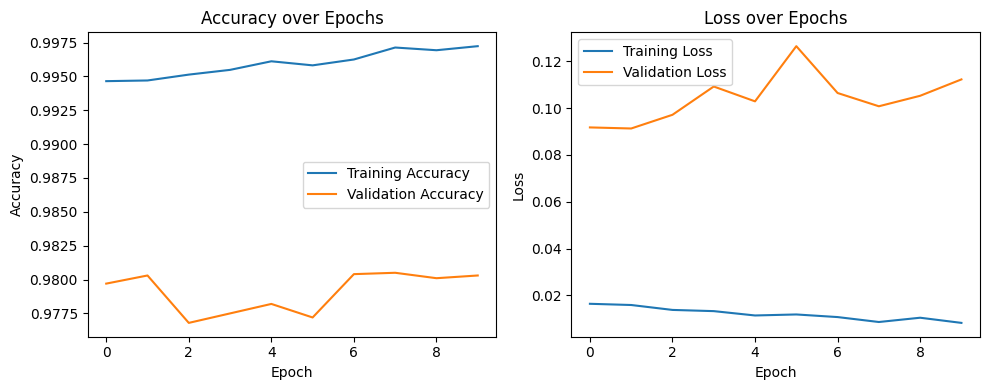

In [11]:
if __name__ == "__main__":
    main()